In [1]:
import pandas as pd

In [2]:
file = 'salaries-by-college-type.csv'

In [3]:
df = pd.read_csv(file)

In [4]:
df

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN
5,Worcester Polytechnic Institute (WPI),Engineering,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00"
6,Carnegie Mellon University (CMU),Engineering,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00"
7,Rensselaer Polytechnic Institute (RPI),Engineering,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00"
8,Georgia Institute of Technology,Engineering,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00"
9,Colorado School of Mines,Engineering,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00"


Fix the data types

In [7]:
cols = df.columns
for col in cols:
    try:
        df[col] = df[col].apply(lambda x: x.replace('$','').replace(',',''))
        df[col] = pd.to_numeric(df[col])
    except:
        pass

School Name
School Type
Starting Median Salary
Mid-Career Median Salary
Mid-Career 10th Percentile Salary
Mid-Career 25th Percentile Salary
Mid-Career 75th Percentile Salary
Mid-Career 90th Percentile Salary


In [36]:
ranked = df.sort_values('Mid-Career Median Salary', ascending=False).reset_index(drop=True)
top_50_mid = df.head(50).sort_values('Mid-Career Median Salary', ascending=False).reset_index(drop=True)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Top 50 Schools by Mid-career Median Salary')

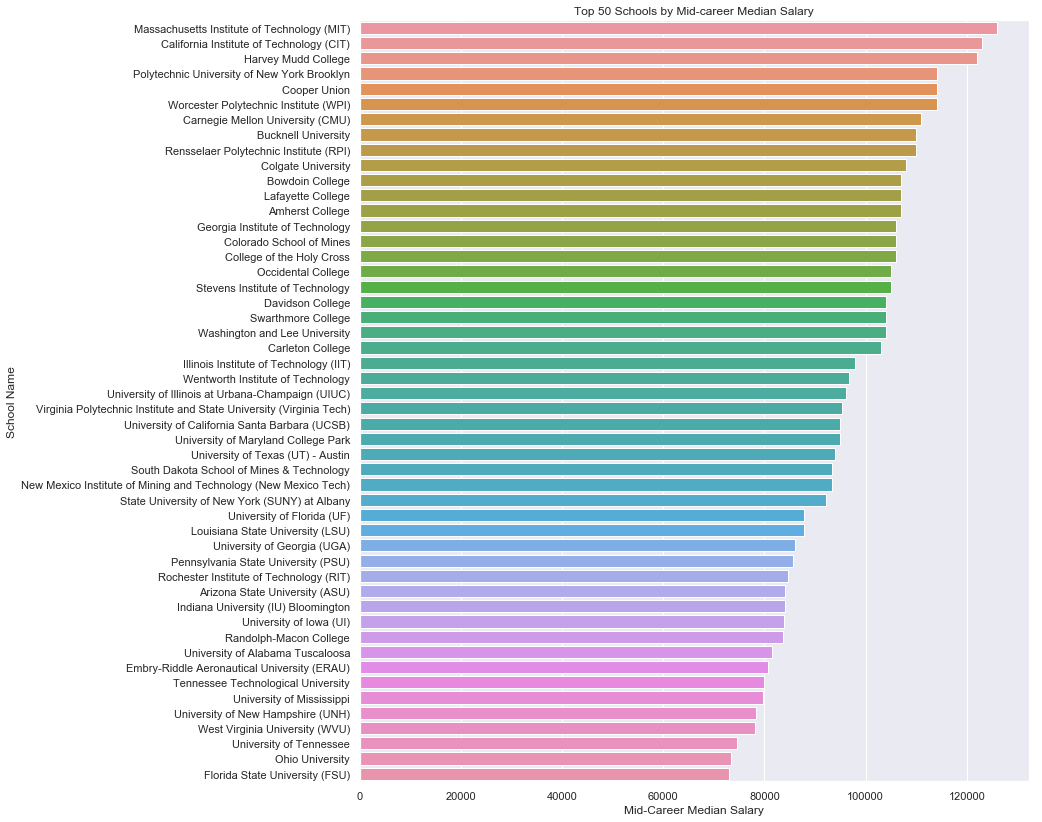

In [31]:
fig,ax = plt.subplots(figsize=(12,14))
sns.barplot(data=top_50_mid, x='Mid-Career Median Salary',y='School Name', ax=ax)
plt.title('Top 50 Schools by Mid-career Median Salary')

Group by school type and take means to find out which types of schools do best

In [16]:
df.groupby('School Type')['Starting Median Salary','Mid-Career Median Salary'].mean().sort_values('Mid-Career Median Salary',ascending=False)

,Starting Median Salary,Mid-Career Median Salary
School Type,,
Ivy League,60475.000000,120125.000000
Engineering,59057.894737,103842.105263
Liberal Arts,45746.808511,89378.723404
Party,45715.000000,84685.000000
State,44126.285714,78567.428571


Find stony brook's ranking by mid career median salary

In [37]:
ranked[ranked['School Name'].str.contains('Stony')]

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
64,Stony Brook University,State,49500.0,93000.0,"$47,200.00",67100.0,129000.0,"$181,000.00"
